In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data
data = pd.read_csv("House_Sale_Prices_w_Attributes.csv")

# Display the first few rows of the dataframe
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190810 entries, 0 to 190809
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   landsqft       179437 non-null  float64
 1   yrblt          190487 non-null  float64
 2   saledate       190810 non-null  object 
 3   saleprice      168036 non-null  float64
 4   bathrooms      190810 non-null  float64
 5   kitchens       189813 non-null  float64
 6   heat_num       190810 non-null  object 
 7   season_spring  190810 non-null  int64  
 8   season_summer  190810 non-null  int64  
 9   season_fall    190810 non-null  int64  
 10  season_winter  190810 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 16.0+ MB


(None,
    landsqft   yrblt   saledate  saleprice  bathrooms  kitchens heat_num  \
 0    8000.0  1925.0  9/16/2004   128449.0        2.0       1.0       FA   
 1    9364.0  1905.0   7/2/2012   369000.0        2.0       1.0       FA   
 2    5000.0  1924.0   6/1/1998        0.0        1.5       1.0       FA   
 3    5000.0  1904.0   3/7/2017   328100.0        1.0       1.0       FA   
 4    2500.0  2011.0   6/1/2016   400000.0        2.0       2.0       FA   
 
    season_spring  season_summer  season_fall  season_winter  
 0              0              0            1              0  
 1              0              1            0              0  
 2              0              1            0              0  
 3              1              0            0              0  
 4              0              1            0              0  )

In [11]:
# Remove rows where 'saleprice' is missing
data = data[data['saleprice'].notna()]

# Check the summary again to see if there are any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168036 entries, 0 to 190807
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   landsqft       158510 non-null  float64
 1   yrblt          167781 non-null  float64
 2   saledate       168036 non-null  object 
 3   saleprice      168036 non-null  float64
 4   bathrooms      168036 non-null  float64
 5   kitchens       167296 non-null  float64
 6   heat_num       168036 non-null  object 
 7   season_spring  168036 non-null  int64  
 8   season_summer  168036 non-null  int64  
 9   season_fall    168036 non-null  int64  
 10  season_winter  168036 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 15.4+ MB


In [12]:
# Impute missing values with median
for column in ["landsqft", "yrblt", "kitchens"]:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

# Check if there are any more missing values
missing_after_imputation = data.isnull().sum()

# Check unique values in "heat_num"
unique_heat_num = data['heat_num'].unique()

missing_after_imputation, unique_heat_num

(landsqft         0
 yrblt            0
 saledate         0
 saleprice        0
 bathrooms        0
 kitchens         0
 heat_num         0
 season_spring    0
 season_summer    0
 season_fall      0
 season_winter    0
 dtype: int64,
 array(['FA', 'GR', 'HP', 'BB', 'HW', '.', 'OT', 'CC', 'NH', 'SR'],
       dtype=object))

In [13]:
# One-hot encode 'heat_num' column
data_encoded = pd.get_dummies(data, columns=['heat_num'], prefix='heat')

# Ensure the encoding worked as expected
data_encoded.head()

,landsqft,yrblt,saledate,saleprice,bathrooms,kitchens,season_spring,season_summer,season_fall,season_winter,heat_.,heat_BB,heat_CC,heat_FA,heat_GR,heat_HP,heat_HW,heat_NH,heat_OT,heat_SR
0,8000.0,1925.0,9/16/2004,128449.0,2.0,1.0,0,0,1,0,False,False,False,True,False,False,False,False,False,False
1,9364.0,1905.0,7/2/2012,369000.0,2.0,1.0,0,1,0,0,False,False,False,True,False,False,False,False,False,False
2,5000.0,1924.0,6/1/1998,0.0,1.5,1.0,0,1,0,0,False,False,False,True,False,False,False,False,False,False
3,5000.0,1904.0,3/7/2017,328100.0,1.0,1.0,1,0,0,0,False,False,False,True,False,False,False,False,False,False
4,2500.0,2011.0,6/1/2016,400000.0,2.0,2.0,0,1,0,0,False,False,False,True,False,False,False,False,False,False


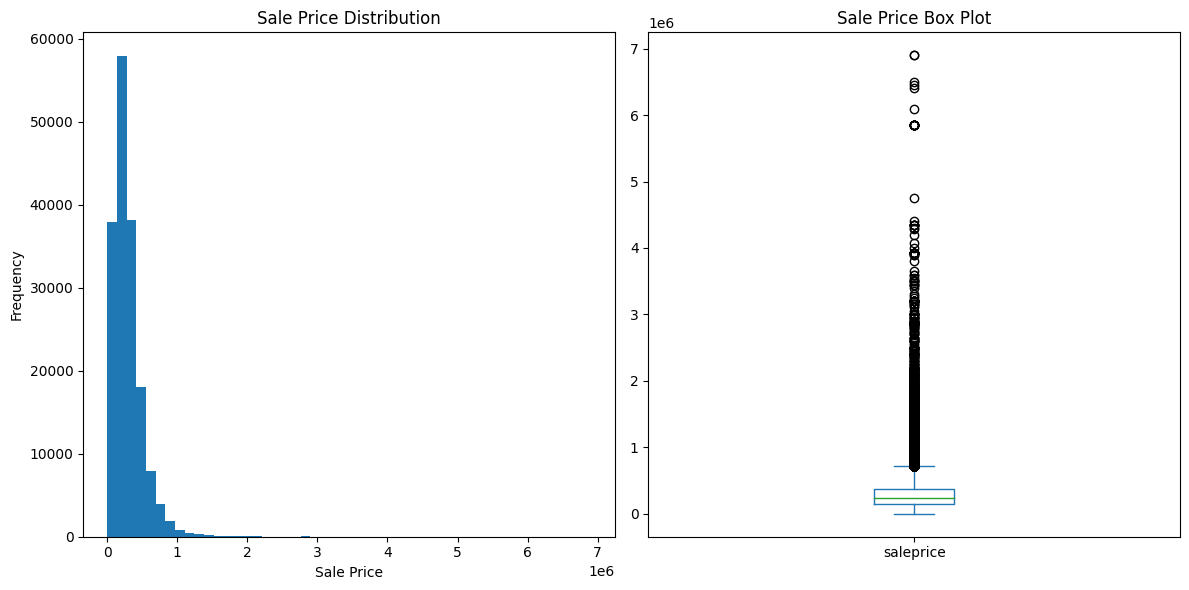

(count    1.680360e+05
 mean     2.926575e+05
 std      2.395944e+05
 min      0.000000e+00
 25%      1.470000e+05
 50%      2.450000e+05
 75%      3.750000e+05
 max      6.900000e+06
 Name: saleprice, dtype: float64,
    landsqft   yrblt   saledate  saleprice  bathrooms  kitchens  season_spring  \
 0    8000.0  1925.0 2004-09-16   128449.0        2.0       1.0              0   
 1    9364.0  1905.0 2012-07-02   369000.0        2.0       1.0              0   
 2    5000.0  1924.0 1998-06-01        0.0        1.5       1.0              0   
 3    5000.0  1904.0 2017-03-07   328100.0        1.0       1.0              1   
 4    2500.0  2011.0 2016-06-01   400000.0        2.0       2.0              0   
 
    season_summer  season_fall  season_winter  ...  heat_BB  heat_CC  heat_FA  \
 0              0            1              0  ...    False    False     True   
 1              1            0              0  ...    False    False     True   
 2              1            0              0

In [14]:

# Convert 'saledate' to datetime object
data_encoded['saledate'] = pd.to_datetime(data_encoded['saledate'])

# Extract year of sale as a new feature
data_encoded['sale_year'] = data_encoded['saledate'].dt.year

# Explore 'saleprice' distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Sale Price Distribution')
data_encoded['saleprice'].plot(kind='hist', bins=50)
plt.xlabel('Sale Price')

plt.subplot(1, 2, 2)
plt.title('Sale Price Box Plot')
data_encoded['saleprice'].plot(kind='box')

plt.tight_layout()
plt.show()

# Calculate basic statistics for 'saleprice'
saleprice_stats = data_encoded['saleprice'].describe()

# Check the first few rows of the updated dataframe
first_rows = data_encoded.head()

saleprice_stats, first_rows

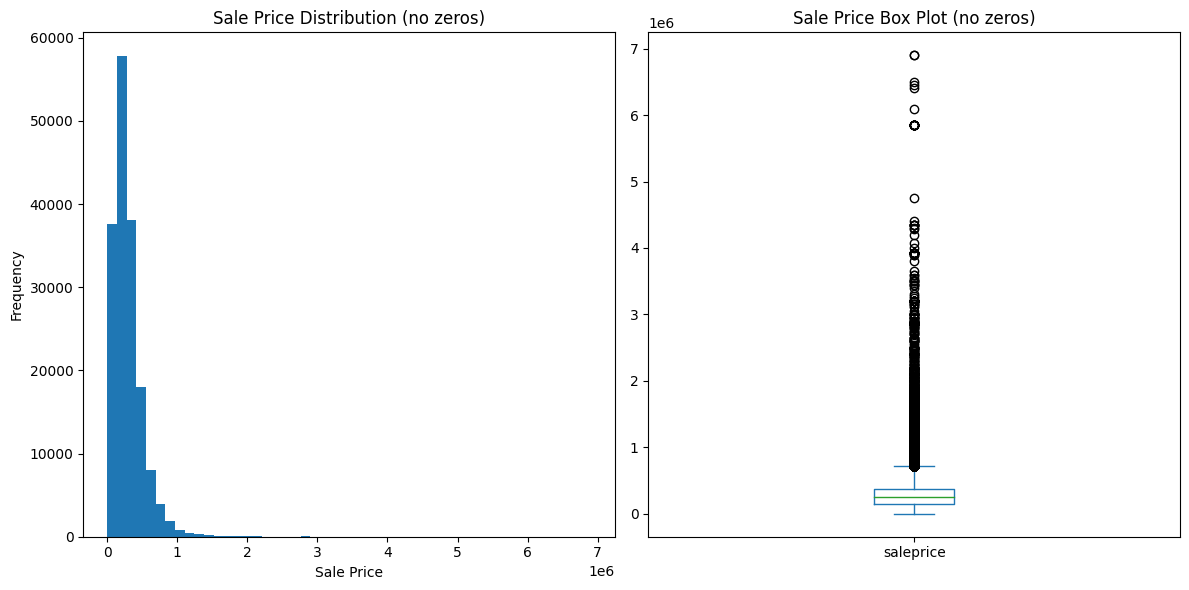

count    1.674480e+05
mean     2.936852e+05
std      2.393852e+05
min      1.000000e+00
25%      1.480000e+05
50%      2.465000e+05
75%      3.760000e+05
max      6.900000e+06
Name: saleprice, dtype: float64

In [15]:
# Remove records with 'saleprice' of zero
data_encoded = data_encoded[data_encoded['saleprice'] > 0]

# Re-evaluate 'saleprice' distribution after removing zero prices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Sale Price Distribution (no zeros)')
data_encoded['saleprice'].plot(kind='hist', bins=50)
plt.xlabel('Sale Price')

plt.subplot(1, 2, 2)
plt.title('Sale Price Box Plot (no zeros)')
data_encoded['saleprice'].plot(kind='box')

plt.tight_layout()
plt.show()

# Calculate basic statistics for 'saleprice' after removing zeros
saleprice_stats_no_zeros = data_encoded['saleprice'].describe()

saleprice_stats_no_zeros


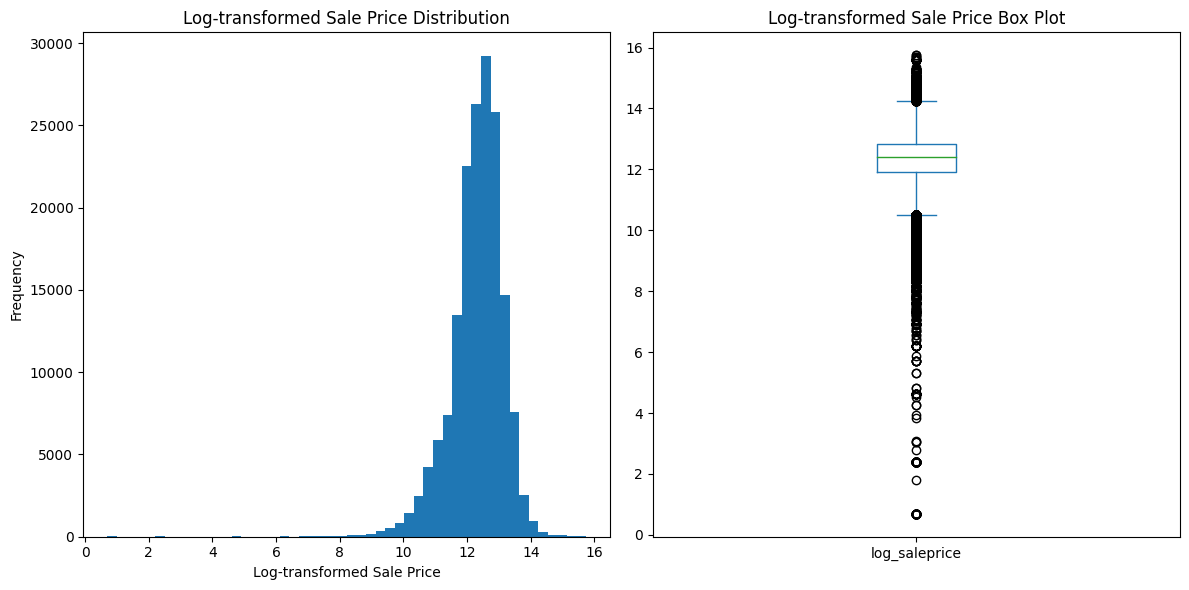

count    167448.000000
mean         12.301909
std           0.877758
min           0.693147
25%          11.904974
50%          12.415121
75%          12.837347
max          15.747032
Name: log_saleprice, dtype: float64

In [16]:
import numpy as np

# Apply logarithmic transformation
data_encoded['log_saleprice'] = np.log1p(data_encoded['saleprice'])

# Evaluate the new distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Log-transformed Sale Price Distribution')
data_encoded['log_saleprice'].plot(kind='hist', bins=50)
plt.xlabel('Log-transformed Sale Price')

plt.subplot(1, 2, 2)
plt.title('Log-transformed Sale Price Box Plot')
data_encoded['log_saleprice'].plot(kind='box')

plt.tight_layout()
plt.show()

# Calculate basic statistics for log-transformed 'saleprice'
log_saleprice_stats = data_encoded['log_saleprice'].describe()

log_saleprice_stats


In [17]:
from sklearn.model_selection import train_test_split

# Drop the original 'saleprice' and 'saledate' columns
data_model = data_encoded.drop(columns=['saleprice', 'saledate'])

# Separate features from the target variable
X = data_model.drop(columns=['log_saleprice'])
y = data_model['log_saleprice']

# Split the data into training and test sets (75-25 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape


((125586, 19), (41862, 19))

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Transform back to the original scale
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Calculate the performance metrics
mse = mean_squared_error(y_test_exp, y_pred_exp)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_exp, y_pred_exp)
r2 = r2_score(y_test_exp, y_pred_exp)

mse, rmse, mae, r2

(28489043678.79526, 168786.97721920154, 84930.65865674095, 0.5255912611607497)

In [23]:
print("Random Forest model\n")
print(f"mse : {mse} \n")
print(f"rmse : {rmse} \n")
print(f"mae : {mae} \n")
print(f"r2 : {r2} \n")

Random Forest model

mse : 28489043678.79526 

rmse : 168786.97721920154 

mae : 84930.65865674095 

r2 : 0.5255912611607497 



In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict on the test data
y_pred = dt.predict(X_test)

# Transform back to the original scale
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Calculate the performance metrics
mse = mean_squared_error(y_test_exp, y_pred_exp)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_exp, y_pred_exp)
r2 = r2_score(y_test_exp, y_pred_exp)

# Print the performance metrics
print("DecisionTreeRegressor")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


DecisionTreeRegressor
Mean Squared Error (MSE): 50295069459.58338
Root Mean Squared Error (RMSE): 224265.6225541119
Mean Absolute Error (MAE): 111497.70867896828
R-squared (R2): 0.1624702906432397


In [27]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the model
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = xg_reg.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("xgboost")
print("RMSE: %f" % (rmse))
print("R2: %f" % (r2))


xgboost
RMSE: 0.775898
R2: 0.192337


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Ensure only numeric data
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Convert dataframe to numpy array
X_train_np = X_train_numeric.values
X_test_np = X_test_numeric.values
y_train_np = y_train.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)

# Check for NaN and infinity values in the dataset
if np.isnan(X_train_np).any() | np.isnan(y_train_np).any() | np.isinf(X_train_np).any() | np.isinf(y_train_np).any():
    print("NaN or infinity values detected in the dataset. Consider handling them before model training.")
else:
    # Define model
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_np.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))  # linear is used for regression

    # Compile model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Fit the model
    model.fit(X_train_np, y_train_np, epochs=100, batch_size=10, validation_split = 0.1)

    # Evaluate the model
    mse, mae = model.evaluate(X_test_np, y_test_np)

    print("Neural Network with TensorFlow")
    print('MSE: %.3f, MAE: %.3f' % (mse, mae))


Epoch 1/100
11303/11303 [==============================] - 5s 470us/step - loss: 272136.1562 - mae: 47.3053 - val_loss: 1737416.1250 - val_mae: 62.9184
Epoch 2/100
11303/11303 [==============================] - 5s 461us/step - loss: 124279.1953 - mae: 47.6758 - val_loss: 16239.0830 - val_mae: 38.2169
Epoch 3/100
11303/11303 [==============================] - 5s 461us/step - loss: 36555.9805 - mae: 29.9186 - val_loss: 122.0286 - val_mae: 5.0282
Epoch 4/100
11303/11303 [==============================] - 5s 469us/step - loss: 8418.0977 - mae: 10.0517 - val_loss: 473.3938 - val_mae: 6.5626
Epoch 5/100
11303/11303 [==============================] - 5s 462us/step - loss: 292.3927 - mae: 1.2227 - val_loss: 0.7892 - val_mae: 0.6412
Epoch 6/100
11303/11303 [==============================] - 5s 462us/step - loss: 0.7803 - mae: 0.6263 - val_loss: 0.7845 - val_mae: 0.6274
Epoch 7/100
11303/11303 [==============================] - 5s 480us/step - loss: 0.7808 - mae: 0.6268 - val_loss: 0.7882 - val_

11303/11303 [==============================] - 5s 470us/step - loss: 0.7798 - mae: 0.6258 - val_loss: 0.7848 - val_mae: 0.6265
Epoch 60/100
11303/11303 [==============================] - 5s 465us/step - loss: 0.7800 - mae: 0.6261 - val_loss: 0.7844 - val_mae: 0.6276
Epoch 61/100
11303/11303 [==============================] - 5s 469us/step - loss: 0.7800 - mae: 0.6259 - val_loss: 0.7843 - val_mae: 0.6281
Epoch 62/100
11303/11303 [==============================] - 5s 467us/step - loss: 0.7800 - mae: 0.6261 - val_loss: 0.7868 - val_mae: 0.6375
Epoch 63/100
11303/11303 [==============================] - 5s 466us/step - loss: 0.7798 - mae: 0.6258 - val_loss: 0.7851 - val_mae: 0.6340
Epoch 64/100
11303/11303 [==============================] - 5s 469us/step - loss: 0.7801 - mae: 0.6260 - val_loss: 0.7947 - val_mae: 0.6480
Epoch 65/100
11303/11303 [==============================] - 5s 466us/step - loss: 0.7799 - mae: 0.6260 - val_loss: 0.7893 - val_mae: 0.6231
Epoch 66/100
11303/11303 [=======

In [33]:
from sklearn.metrics import r2_score

# Predict values with the model
y_pred_np = model.predict(X_test_np)

# Calculate R-squared value
r_squared = r2_score(y_test_np, y_pred_np)

print("R-squared (R2):", r_squared)

1309/1309 [==============================] - 0s 281us/step
R-squared (R2): -0.003374805726197083


In [34]:
# Saving features
X.to_csv('features.csv', index=False)

# Saving target variable
y.to_csv('target.csv', index=False)

# Concatenating features and target variable into a single DataFrame
complete_data = pd.concat([X, y], axis=1)

# Saving to a CSV
complete_data.to_csv('complete_data.csv', index=False)
